In [1]:
import sys
sys.path.append('../')
from lib.perfeval import PaymentStoriesPerformanceEvaluator
from lib.input_const import payment_stories_file, PaymentStoriesColumns
import seaborn as sb
import pandas as pd

In [2]:
source_codename = 'Adbouti'
input_code = 202212
evaluator = PaymentStoriesPerformanceEvaluator(payment_stories_file(input_code, source_codename), source_codename)

In [3]:
roc = evaluator.roc_curve(
    predictor_col=PaymentStoriesColumns.ScaledDelayMean.name, 
    threshold_min=-3, 
    threshold_max=3, 
    steps=100, 
    actual_col=PaymentStoriesColumns.DenotesAnyRisk.name
)


In [4]:
roc

,False Positive Rate,True Positive Rate
-3.00,1.000000,1.000000
-2.94,1.000000,1.000000
-2.88,1.000000,1.000000
-2.82,1.000000,1.000000
-2.76,1.000000,1.000000
...,...,...
2.76,0.012693,0.048128
2.82,0.011992,0.048128
2.88,0.011603,0.048128
2.94,0.011057,0.048128


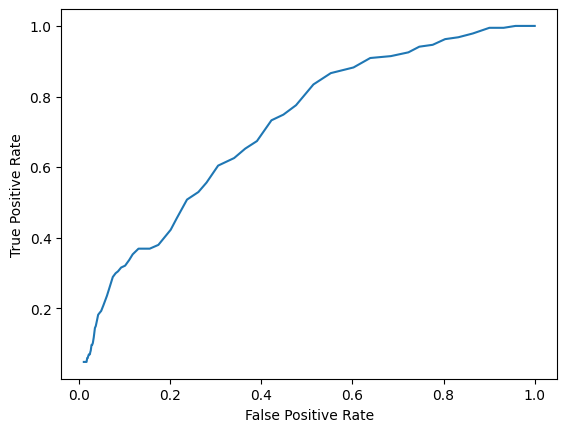

In [5]:
sb.lineplot(roc, x=roc.columns[0], y=roc.columns[1]);

In [4]:
f1 = evaluator.f1_curve(
    predictor_col=PaymentStoriesColumns.ScaledDelayMean.name, 
    actual_col=PaymentStoriesColumns.DenotesAnyRisk.name
)

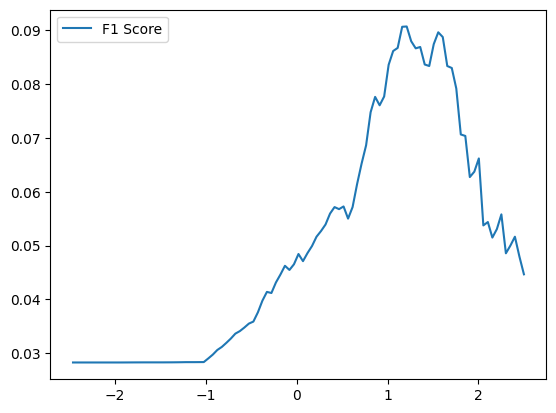

In [5]:
sb.lineplot(f1);

In [6]:
ck = evaluator.cohen_kappa_curve(
    predictor_col=PaymentStoriesColumns.ScaledDelayMean.name, 
    actual_col=PaymentStoriesColumns.DenotesAnyRisk.name
)

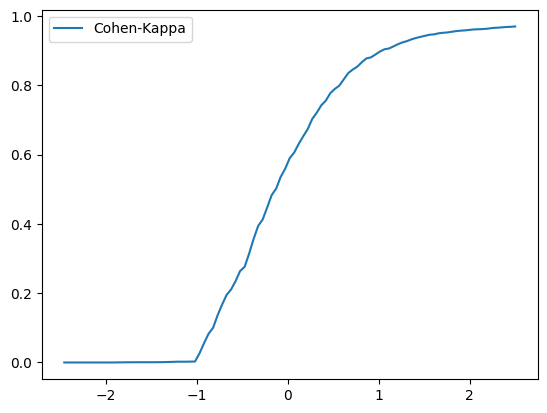

In [7]:
sb.lineplot(ck);

In [15]:
predictor_col = PaymentStoriesColumns.ScaledDelayMean.name
actual_col = PaymentStoriesColumns.DenotesAnyRisk.name
threshold_min = evaluator._default_threshold_min(predictor_col)
threshold_max = evaluator._default_threshold_max(predictor_col)
steps = 20
_thresholds = [threshold_min + _i*(threshold_max - threshold_min)/steps for _i in range(steps+1)]
pd.DataFrame({
    "accuracy": [evaluator.accuracy(predictor_col, _th, actual_col) for _th in _thresholds], 
    "TP": [evaluator._true_positives(predictor_col, _th, actual_col) for _th in _thresholds],
    "TN": [evaluator._true_negatives(predictor_col, _th, actual_col) for _th in _thresholds]
}, index=_thresholds)

,accuracy,TP,TN
-2.457607,0.014353,187,0
-2.209738,0.014353,187,0
-1.961870,0.014353,187,0
-1.714002,0.014967,187,8
-1.466133,0.015043,187,9
-1.218265,0.016578,187,29
-0.970396,0.040602,187,342
-0.722528,0.179062,181,2152
-0.474660,0.286668,173,3562
-0.226791,0.455369,160,5773


In [9]:
roc = evaluator.roc_curve(
    predictor_col=PaymentStoriesColumns.SeverityMean.name, 
    actual_col=PaymentStoriesColumns.DenotesAnyRisk.name
)

In [10]:
roc

,False Positive Rate,True Positive Rate
-29.079784,0.998443,1.000000
-28.480391,0.998365,1.000000
-27.880998,0.998365,1.000000
-27.281605,0.998209,1.000000
-26.682212,0.997975,1.000000
...,...,...
28.461948,0.013471,0.005348
29.061341,0.013160,0.005348
29.660734,0.012926,0.005348
30.260127,0.012381,0.005348


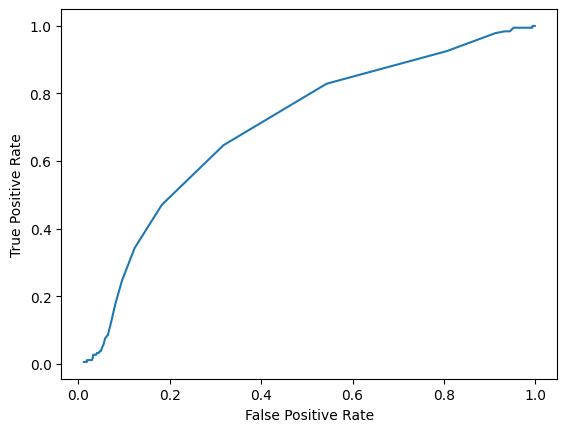

In [11]:
sb.lineplot(roc, x=roc.columns[0], y=roc.columns[1]);

In [15]:
ppv = [_i*0.1 for _i in range(1, 11)]
tpr = [_i*0.1 for _i in range(1, 11)]

In [16]:
pd.DataFrame([[2*(precision*recall)/(precision+recall) for precision in ppv] for recall in tpr], columns=ppv, index=tpr)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,0.100000,0.133333,0.150000,0.160000,0.166667,0.171429,0.175000,0.177778,0.180000,0.181818
0.2,0.133333,0.200000,0.240000,0.266667,0.285714,0.300000,0.311111,0.320000,0.327273,0.333333
0.3,0.150000,0.240000,0.300000,0.342857,0.375000,0.400000,0.420000,0.436364,0.450000,0.461538
0.4,0.160000,0.266667,0.342857,0.400000,0.444444,0.480000,0.509091,0.533333,0.553846,0.571429
0.5,0.166667,0.285714,0.375000,0.444444,0.500000,0.545455,0.583333,0.615385,0.642857,0.666667
0.6,0.171429,0.300000,0.400000,0.480000,0.545455,0.600000,0.646154,0.685714,0.720000,0.750000
0.7,0.175000,0.311111,0.420000,0.509091,0.583333,0.646154,0.700000,0.746667,0.787500,0.823529
0.8,0.177778,0.320000,0.436364,0.533333,0.615385,0.685714,0.746667,0.800000,0.847059,0.888889
0.9,0.180000,0.327273,0.450000,0.553846,0.642857,0.720000,0.787500,0.847059,0.900000,0.947368
1.0,0.181818,0.333333,0.461538,0.571429,0.666667,0.750000,0.823529,0.888889,0.947368,1.000000
